In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
csv_path = os.path.join('..', 'data', 'Zip_Zhvi_2bedroom.csv')
df_2bed = pd.read_csv(csv_path)
csv_path2 = os.path.join('..', 'data', 'Zip_Zhvi_3bedroom.csv')
df_3bed = pd.read_csv(csv_path2)
csv_path3 = os.path.join('..', 'data', 'census_data.csv')
census_df = pd.read_csv(csv_path3)
census_df.head()
len(census_df)

33120

In [5]:
#Extract unique zipcodes 
unique_zip=census_df["Zipcode"].unique()
len(unique_zip)

33120

In [6]:
# Analysis using data for 2 bedroom homes
df_2a = df_2bed[["RegionName", 'City', 'State'
, 'CountyName'
,'2017-11']]
df2 = df_2a[np.isfinite(df_2a['2017-11'])]
df2['2017-11'] = df2['2017-11'].apply(np.int32)
df2 = df2.rename(columns={'RegionName': 'Zipcode', '2017-11' : 'Price'})
df2.head()

C:\Users\vjace\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Zipcode,City,State,CountyName,Price
0,10025,New York,NY,New York,1469200
1,60657,Chicago,IL,Cook,378200
2,10023,New York,NY,New York,1968600
3,60614,Chicago,IL,Cook,405900
4,79936,El Paso,TX,El Paso,84300


In [7]:
#Remove zipcodes that are not 5 digits, keep only 5 digit zipcodes
df2 = df2.drop(df2[df2.Zipcode > 99999].index)
df2 = df2.drop(df2[df2.Zipcode < 9999].index)

In [8]:
# Merge census df and 2br df based on zipcode columns
inner_merge_df = pd.merge(df2, census_df, on="Zipcode")
inner_merge_df.head()
len(inner_merge_df)

9088

In [12]:
inner_merge_df.max()

Zipcode                  99901
City                      Zuni
State                       WY
CountyName              Zavala
Price                  3225300
Population              115104
Median Age                75.5
 Household Income      99,996 
Per Capita Income       207743
Poverty Count            40661
Poverty Rate           60.9442
dtype: object

In [13]:
inner_merge_df.min()

Zipcode                        10003
City                        Aberdeen
State                             AK
CountyName                       Ada
Price                          30100
Population                       123
Median Age                      19.7
 Household Income      (666,666,666)
Per Capita Income               6079
Poverty Count                      0
Poverty Rate                       0
dtype: object

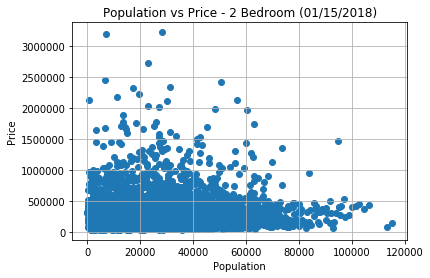

In [14]:
# Population vs Price Plot
# Build a scatter plot for each data type
plt.scatter(inner_merge_df["Population"], inner_merge_df["Price"], marker="o")

# Incorporate the other graph properties
plt.title("Population vs Price - 2 Bedroom (01/15/2018)")
plt.ylabel("Price")
plt.xlabel("Population")
plt.grid(True)

# Save the figure
#plt.savefig("LatitudevsTemperaturePlot")



# Show plot
plt.show()

In [16]:
df_3a = df_3bed[["RegionName", 'City', 'State'
, 'CountyName'
,'2017-11']]
df3 = df_3a[np.isfinite(df_3a['2017-11'])]
df3['2017-11'] = df3['2017-11'].apply(np.int32)
df3 = df3.rename(columns={'RegionName': 'Zipcode', '2017-11' : 'Price'})
df3.head()

,Zipcode,City,State,CountyName,Price
0,60657,Chicago,IL,Cook,567300
1,60614,Chicago,IL,Cook,628700
2,79936,El Paso,TX,El Paso,111700
3,60640,Chicago,IL,Cook,375200
4,77084,Houston,TX,Harris,151400


In [17]:
df3 = df3.drop(df3[df3.Zipcode > 99999].index)
df3 = df3.drop(df3[df3.Zipcode < 9999].index)

In [18]:
# Merge census df and 3br df
inner_merge_df = pd.merge(df3, census_df, on="Zipcode")
inner_merge_df.head()
len(inner_merge_df)

11896

In [19]:
inner_merge_df.max()

Zipcode                  99901
City                      Zuni
State                       WY
CountyName              Zavala
Price                  5319700
Population              115104
Median Age                75.5
 Household Income      99,958 
Per Capita Income       207743
Poverty Count            40661
Poverty Rate           58.5785
dtype: object

In [20]:
inner_merge_df.min()

Zipcode                        10022
City                       Abbeville
State                             AK
CountyName                       Ada
Price                          31900
Population                        17
Median Age              -6.66667e+08
 Household Income      (666,666,666)
Per Capita Income               6079
Poverty Count                      0
Poverty Rate                       0
dtype: object

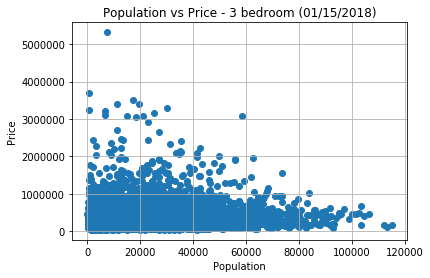

In [21]:
# Population vs Price Plot
# Build a scatter plot for each data type
plt.scatter(inner_merge_df["Population"], inner_merge_df["Price"], marker="o")

# Incorporate the other graph properties
plt.title("Population vs Price - 3 bedroom (01/15/2018)")
plt.ylabel("Price")
plt.xlabel("Population")
plt.grid(True)

# Save the figure
#plt.savefig("LatitudevsTemperaturePlot")



# Show plot
plt.show()